In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
data_folder = './data/income'
data_file = 'Raw_WIDER_data.csv'

In [5]:
country = 'Belgium'

In [6]:
decile = ['d'+str(i) for i in range(1, 11)]

In [7]:
dataset = pd.read_csv(os.path.join(data_folder, data_file), index_col='id', encoding='cp1252')

In [8]:
dataset.loc[(dataset['country'] == country)]

,country,c3,iso,c2,year,iso_yr,Unnamed: 7,rural_pop_pct,gini_reported,palma,...,urban_pop,revision,quality,quality_score,source,source_detailed,source_comments,survey,link,staple_demand
id,,,,,,,,,,,,,,,,,,,,,
791,Belgium,BEL,bel,BE,1969,bel1969,Belgium1969,6.293,36.40,1.55,...,8995545,NaN,Low,7,United Nations,United Nations 1981,Tax data,Tax data,NaN,NaN
792,Belgium,BEL,bel,BE,1969,bel1969,Belgium1969,6.293,32.30,1.25,...,8995545,NaN,Low,7,United Nations,United Nations 1981,Tax data,Tax data,NaN,NaN
793,Belgium,BEL,bel,BE,1973,bel1973,Belgium1973,5.767,43.80,NaN,...,1,NaN,Low,5,United Nations,United Nations 1981,Tax data,Tax data,NaN,NaN
794,Belgium,BEL,bel,BE,1975,bel1975,Belgium1975,5.520,41.90,NaN,...,1,NaN,Low,5,United Nations,United Nations 1981,Tax data,Tax data,NaN,NaN
795,Belgium,BEL,bel,BE,1976,bel1976,Belgium1976,5.400,41.60,NaN,...,1,NaN,Low,5,United Nations,United Nations 1981,Tax data,Tax data,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,Belgium,BEL,bel,BE,2015,bel2015,Belgium2015,2.124,27.73,0.98,...,11048175,New 2019,Average,13,World Bank,World Bank 2019,PovcalNet,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,1.258579
893,Belgium,BEL,bel,BE,2016,bel2016,Belgium2016,2.081,26.30,0.90,...,11118122,New 2019,High,13,Eurostat,Eurostat 2019,NaN,European Union Statistics on Income and Living...,https://ec.europa.eu/eurostat/web/income-and-l...,1.297731
894,Belgium,BEL,bel,BE,2016,bel2016,Belgium2016,2.081,26.60,0.92,...,11118122,New 2019,High,12,OECD,OECD 2019,NaN,NaN,http://www.oecd.org/social/income-distribution...,1.297731


In [9]:
def show_resources_for_country_and_year(country, year):
    sel_dataset = dataset.loc[(dataset['country'] == country)]
    sel_year = sel_dataset.loc[dataset['year'] == year].set_index('source')
    print('details for "'+country+'":\n')
    print(sel_year['resource_detailed'])
    
    

In [11]:
show_resources_for_country_and_year('France', 1993)

details for "France":

Series([], Name: resource_detailed, dtype: object)


In [12]:
def plot_country_and_year_deciles(country, year, ax=None, kind='bar', sel_sources=None):
    sel_dataset = dataset.loc[(dataset['country'] == country)]
    sel_year = sel_dataset.loc[dataset['year'] == year].set_index('source')
    print('details for "'+country+'":\n')
    print(sel_year['resource_detailed'])
    print('\n')
    decile = ['d'+str(i) for i in range(1, 11)]
    plot_data = sel_year[['year', 'gini_reported', 'palma'] + decile]
    
    if sel_sources is None:
        ax = plot_data[decile].transpose().plot(ax=ax, kind=kind)
    else:
        print('selected sources:', sel_year['resource'].iloc[sel_sources])
        ax = plot_data[decile].iloc[sel_sources].transpose().plot(ax=ax, kind=kind)
    ax.set_xlabel('deciles')
    ax.set_ylabel('share')
    ax.set_title(sel_year['resource'].iloc[0]+' ('+country+')')
    print('\n')
    return ax

details for "United States":

source
Luxembourg Income Study                 Income, net
Luxembourg Income Study                 Income, net
Luxembourg Income Study               Income, gross
Luxembourg Income Study               Income, gross
National statistical authority        Income, gross
National statistical authority        Income, gross
OECD                                    Income, net
World Bank                        Income, net/gross
Research study                          Consumption
Name: resource_detailed, dtype: object


selected sources: source
Luxembourg Income Study    Income (net)
Name: resource, dtype: object




<Axes: title={'center': 'Income (net) (United States)'}, xlabel='deciles', ylabel='share'>

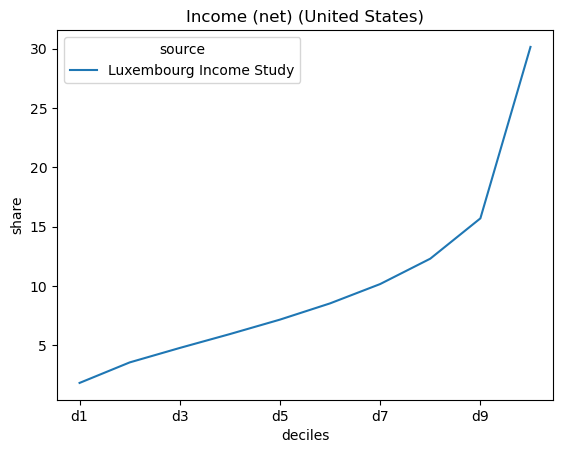

In [14]:
plot_country_and_year_deciles('United States', 2004, kind='line', sel_sources=[0])

details for "Belgium":

source
Eurostat            Income, net
OECD                Income, net
OECD              Income, gross
OECD              Market income
World Bank    Income, net/gross
Name: resource_detailed, dtype: object


selected sources: source
Eurostat    Income (net)
Name: resource, dtype: object




<Axes: title={'center': 'Income (net) (Belgium)'}, xlabel='deciles', ylabel='share'>

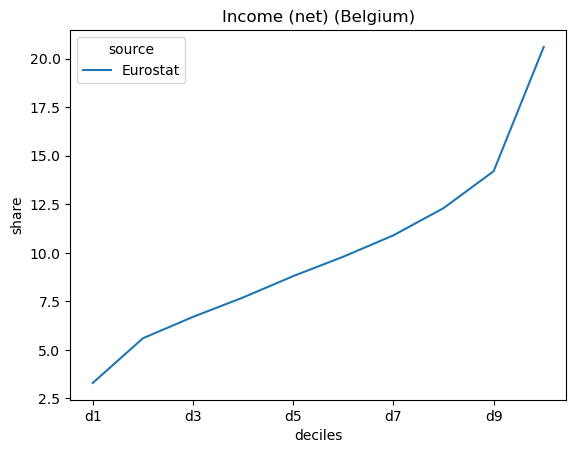

In [16]:
plot_country_and_year_deciles('Belgium', 2004, kind='line', sel_sources=[0])

In [17]:
def plot_countries_and_year_deciles(countries, year, sel_sources, ax=None, kind='bar'):
    gini = list()
    palma = list()
    for country in countries:
        sel_dataset = dataset.loc[(dataset['country'] == country)]
        sel_year = sel_dataset.loc[dataset['year'] == year].set_index('source')
        print('details for "'+country+'":\n')
        print(sel_year['resource_detailed'])
        print('\n')
        decile = ['d'+str(i) for i in range(1, 11)]
        plot_data = sel_year[['year', 'gini_reported', 'palma'] + decile]
        print('selected sources:', sel_year['resource'].iloc[sel_sources[country]])
        ax = plot_data[decile].iloc[sel_sources[country]].transpose().plot(ax=ax, kind=kind, label=country)
        palma.append(plot_data['palma'].iloc[sel_sources[country]])
        gini.append(plot_data['gini_reported'].iloc[sel_sources[country]])
        print('\n')
    ax.set_xlabel('deciles')
    ax.set_ylabel('share')
    ax.set_title(sel_year['resource'].iloc[0]+' ('+str(year)+')')
    legends = [f'{country} (gini: {float(g)}, palma: {float(p)})' for country, g, p in zip(countries, gini, palma)]
    ax.legend(legends)
    return ax

details for "United States":

source
Luxembourg Income Study                 Income, net
Luxembourg Income Study                 Income, net
Luxembourg Income Study               Income, gross
Luxembourg Income Study               Income, gross
National statistical authority        Income, gross
National statistical authority        Income, gross
OECD                                    Income, net
World Bank                        Income, net/gross
Research study                          Consumption
Name: resource_detailed, dtype: object


selected sources: source
Luxembourg Income Study    Income (net)
Name: resource, dtype: object


details for "Belgium":

source
Eurostat            Income, net
OECD                Income, net
OECD              Income, gross
OECD              Market income
World Bank    Income, net/gross
Name: resource_detailed, dtype: object


selected sources: source
Eurostat    Income (net)
Name: resource, dtype: object


details for "France":

source
Eurostat     

/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  legends = [f'{country} (gini: {float(g)}, palma: {float(p)})' for country, g, p in zip(countries, gini, palma)]


<Axes: title={'center': 'Income (net) (2004)'}, xlabel='deciles', ylabel='share'>

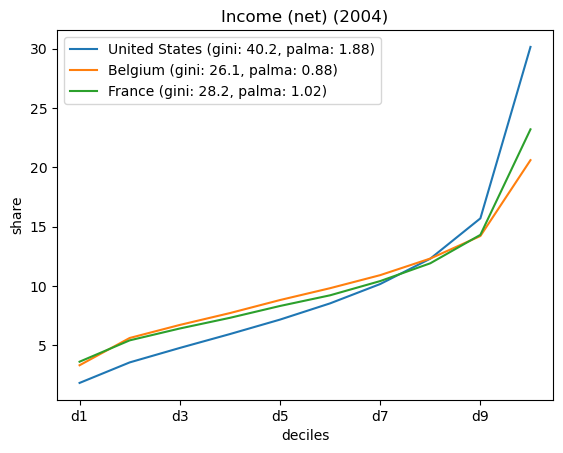

In [18]:
plot_countries_and_year_deciles(['United States', 'Belgium', 'France'], 2004, kind='line', sel_sources={'United States': [0], 'Belgium': [0], 'France': [0]})

details for "United States":

source
Luxembourg Income Study                 Income, net
Luxembourg Income Study                 Income, net
Luxembourg Income Study               Income, gross
Luxembourg Income Study               Income, gross
National statistical authority        Income, gross
National statistical authority        Income, gross
OECD                                    Income, net
World Bank                        Income, net/gross
Research study                          Consumption
Name: resource_detailed, dtype: object


selected sources: source
Luxembourg Income Study    Income (net)
Name: resource, dtype: object


details for "Belgium":

source
Eurostat    Income, net
OECD        Income, net
Name: resource_detailed, dtype: object


selected sources: source
Eurostat    Income (net)
Name: resource, dtype: object


details for "France":

source
Eurostat    Income, net
OECD        Income, net
Name: resource_detailed, dtype: object


selected sources: source
Eurostat   

/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  legends = [f'{country} (gini: {float(g)}, palma: {float(p)})' for country, g, p in zip(countries, gini, palma)]


<Axes: title={'center': 'Income (net) (2016)'}, xlabel='deciles', ylabel='share'>

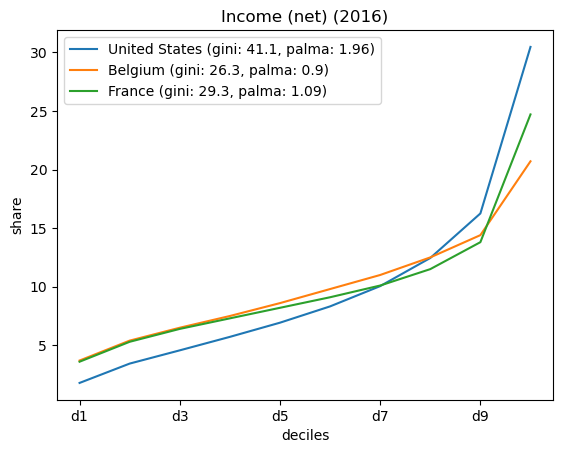

In [19]:
plot_countries_and_year_deciles(['United States', 'Belgium', 'France'], 2016, kind='line', sel_sources={'United States': [0], 'Belgium': [0], 'France': [0]})

details for "United States":

source
Luxembourg Income Study                 Income, net
Luxembourg Income Study                 Income, net
Luxembourg Income Study               Income, gross
Luxembourg Income Study               Income, gross
National statistical authority        Income, gross
National statistical authority        Income, gross
National statistical authority        Income, gross
OECD                                    Income, net
World Bank                        Income, net/gross
Research study                          Income, net
Research study                          Consumption
Name: resource_detailed, dtype: object


selected sources: source
Luxembourg Income Study    Income (net)
Name: resource, dtype: object


details for "Belgium":

source
National statistical authority    Taxable income, net
Name: resource_detailed, dtype: object


selected sources: source
National statistical authority    Earnings
Name: resource, dtype: object


details for "France":

sour

/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  legends = [f'{country} (gini: {float(g)}, palma: {float(p)})' for country, g, p in zip(countries, gini, palma)]
/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  legends = [f'{country} (gini: {float(g)}, palma: {float(p)})' for country, g, p in zip(countries, gini, palma)]
/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  legends = [f'{country} (gini: {float(g)}, palma: {float(p)})' for country, g, p in zip(countries, gini, palma)]
/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated

details for "United States":

source
Luxembourg Income Study                 Income, net
Luxembourg Income Study                 Income, net
Luxembourg Income Study               Income, gross
Luxembourg Income Study               Income, gross
National statistical authority        Income, gross
National statistical authority        Income, gross
OECD                                    Income, net
OECD                                  Market income
World Bank                        Income, net/gross
Research study                          Consumption
Name: resource_detailed, dtype: object


selected sources: source
Luxembourg Income Study    Income (net)
Name: resource, dtype: object


details for "Belgium":

source
Luxembourg Income Study    Income, net
Luxembourg Income Study    Income, net
Eurostat                   Income, net
Name: resource_detailed, dtype: object


selected sources: source
Luxembourg Income Study    Income (net)
Name: resource, dtype: object


details for "France

/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  legends = [f'{country} (gini: {float(g)}, palma: {float(p)})' for country, g, p in zip(countries, gini, palma)]


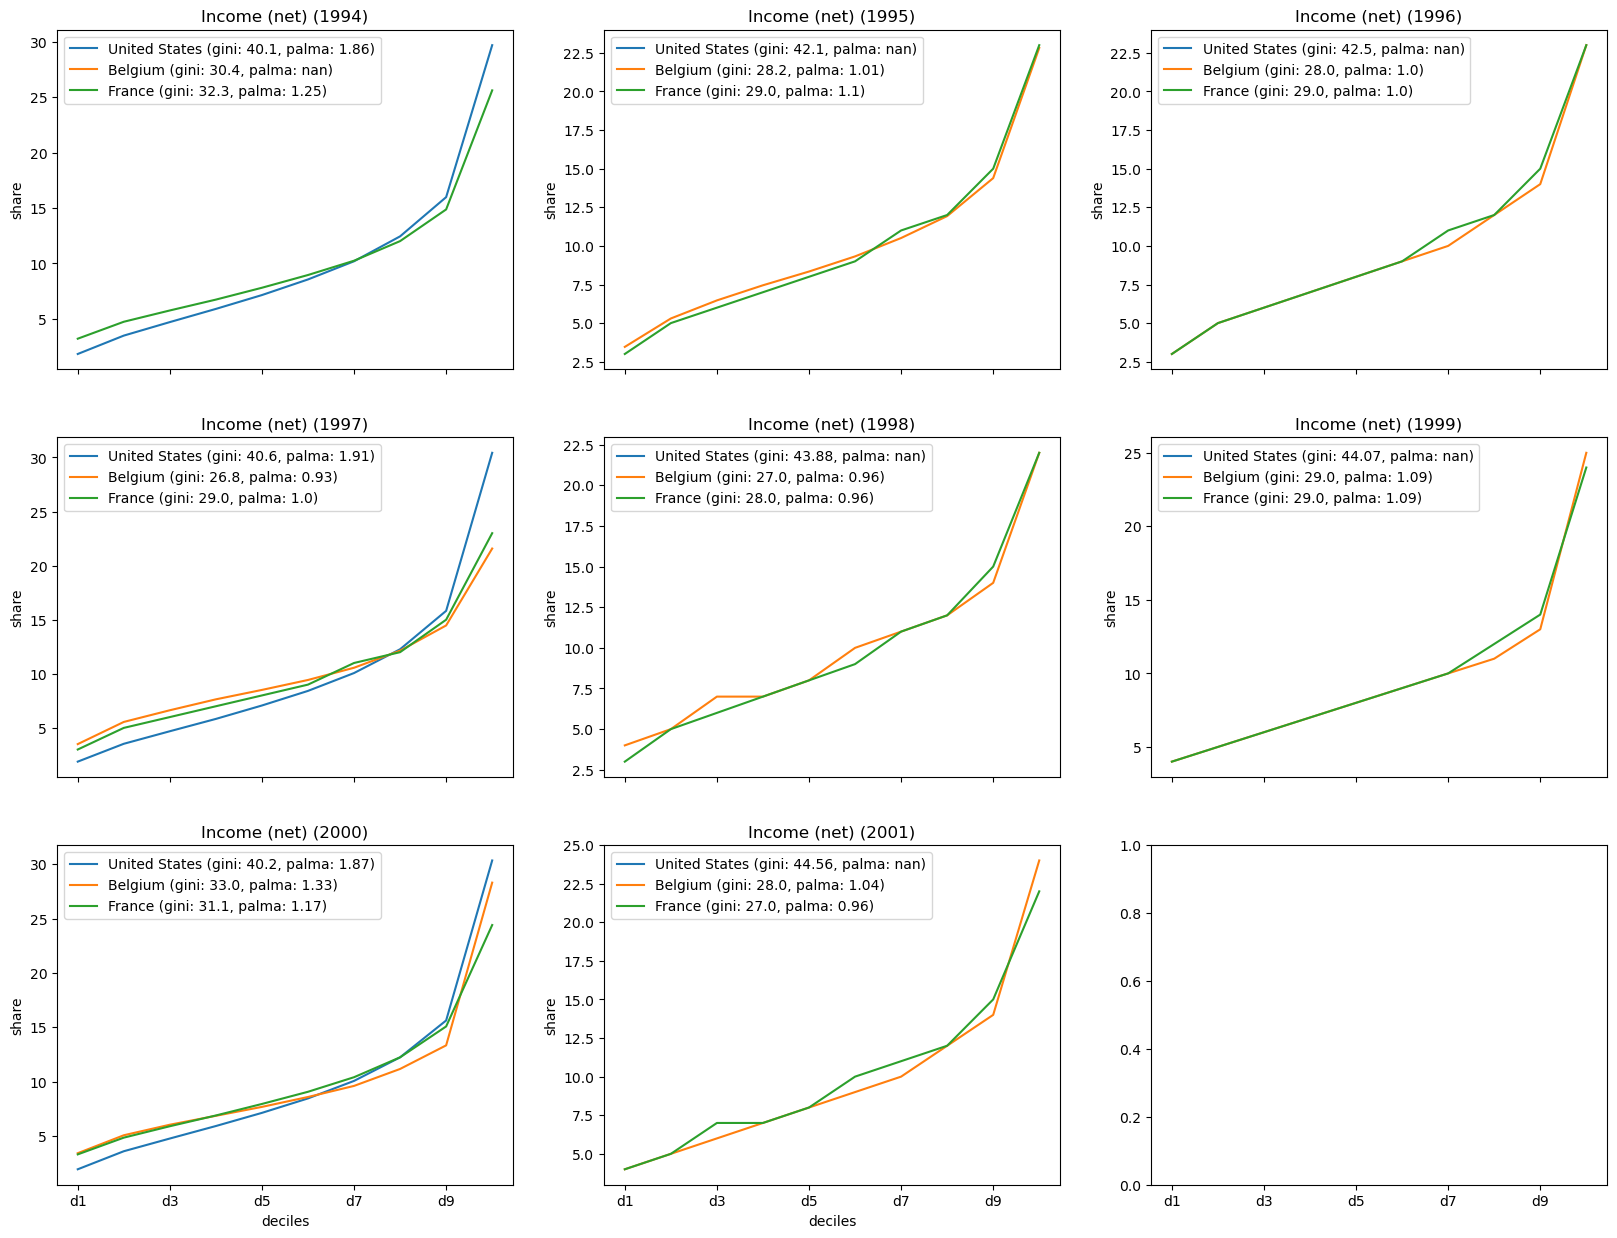

In [20]:
fig, axes = plt.subplots(3,3, figsize=(20,15), sharex=True)
axs = axes.flatten()
for i, y in enumerate(range(1994,2002)):
    plot_countries_and_year_deciles(['United States', 'Belgium', 'France'], y, kind='line', sel_sources={'United States': [0], 'Belgium': [0], 'France': [0]}, ax=axs[i])

details for "United States":

source
National statistical authority    Income, gross
National statistical authority    Income, gross
OECD                                Income, net
Research study                      Consumption
Name: resource_detailed, dtype: object


selected sources: source
National statistical authority    Income (gross)
Name: resource, dtype: object


details for "Belgium":

source
Eurostat            Income, net
World Bank    Income, net/gross
Name: resource_detailed, dtype: object


selected sources: source
Eurostat    Income (net)
Name: resource, dtype: object


details for "France":

source
Eurostat            Income, net
OECD                Income, net
World Bank    Income, net/gross
Name: resource_detailed, dtype: object


selected sources: source
Eurostat    Income (net)
Name: resource, dtype: object


details for "United States":

source
Luxembourg Income Study                 Income, net
Luxembourg Income Study                 Income, net
Luxembourg Incom

/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  legends = [f'{country} (gini: {float(g)}, palma: {float(p)})' for country, g, p in zip(countries, gini, palma)]
/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  legends = [f'{country} (gini: {float(g)}, palma: {float(p)})' for country, g, p in zip(countries, gini, palma)]
/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  legends = [f'{country} (gini: {float(g)}, palma: {float(p)})' for country, g, p in zip(countries, gini, palma)]
/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated



details for "Belgium":

source
Eurostat            Income, net
OECD                Income, net
OECD              Income, gross
OECD              Market income
World Bank    Income, net/gross
Name: resource_detailed, dtype: object


selected sources: source
Eurostat    Income (net)
Name: resource, dtype: object


details for "France":

source
Eurostat            Income, net
OECD                Income, net
World Bank    Income, net/gross
Name: resource_detailed, dtype: object


selected sources: source
Eurostat    Income (net)
Name: resource, dtype: object


details for "United States":

source
National statistical authority    Income, gross
National statistical authority    Income, gross
OECD                                Income, net
OECD                              Market income
Research study                      Consumption
Name: resource_detailed, dtype: object


selected sources: source
National statistical authority    Income (gross)
Name: resource, dtype: object


details for

/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  legends = [f'{country} (gini: {float(g)}, palma: {float(p)})' for country, g, p in zip(countries, gini, palma)]
/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  legends = [f'{country} (gini: {float(g)}, palma: {float(p)})' for country, g, p in zip(countries, gini, palma)]
/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  legends = [f'{country} (gini: {float(g)}, palma: {float(p)})' for country, g, p in zip(countries, gini, palma)]
/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated



details for "Belgium":

source
Eurostat            Income, net
OECD                Income, net
OECD              Income, gross
OECD              Market income
World Bank    Income, net/gross
Name: resource_detailed, dtype: object


selected sources: source
Eurostat    Income (net)
Name: resource, dtype: object


details for "France":

source
Eurostat            Income, net
OECD                Income, net
OECD              Market income
World Bank    Income, net/gross
Name: resource_detailed, dtype: object


selected sources: source
Eurostat    Income (net)
Name: resource, dtype: object


details for "United States":

source
National statistical authority    Income, gross
National statistical authority    Income, gross
OECD                                Income, net
OECD                              Market income
Research study                      Consumption
Name: resource_detailed, dtype: object


selected sources: source
National statistical authority    Income (gross)
Name: resou

/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  legends = [f'{country} (gini: {float(g)}, palma: {float(p)})' for country, g, p in zip(countries, gini, palma)]
/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  legends = [f'{country} (gini: {float(g)}, palma: {float(p)})' for country, g, p in zip(countries, gini, palma)]
/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  legends = [f'{country} (gini: {float(g)}, palma: {float(p)})' for country, g, p in zip(countries, gini, palma)]
/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated



details for "Belgium":

source
Eurostat            Income, net
OECD                Income, net
OECD              Income, gross
OECD              Market income
World Bank    Income, net/gross
Name: resource_detailed, dtype: object


selected sources: source
Eurostat    Income (net)
Name: resource, dtype: object


details for "France":

source
Eurostat            Income, net
OECD                Income, net
OECD              Income, gross
OECD              Market income
World Bank    Income, net/gross
Name: resource_detailed, dtype: object


selected sources: source
Eurostat    Income (net)
Name: resource, dtype: object


details for "United States":

source
Luxembourg Income Study                 Income, net
Luxembourg Income Study                 Income, net
Luxembourg Income Study               Income, gross
Luxembourg Income Study               Income, gross
National statistical authority        Income, gross
National statistical authority        Income, gross
National statistical a

/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  legends = [f'{country} (gini: {float(g)}, palma: {float(p)})' for country, g, p in zip(countries, gini, palma)]
/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  legends = [f'{country} (gini: {float(g)}, palma: {float(p)})' for country, g, p in zip(countries, gini, palma)]
/tmp/ipykernel_293021/2536030392.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  legends = [f'{country} (gini: {float(g)}, palma: {float(p)})' for country, g, p in zip(countries, gini, palma)]




details for "Belgium":

source
Eurostat    Income, net
OECD        Income, net
Name: resource_detailed, dtype: object


selected sources: source
Eurostat    Income (net)
Name: resource, dtype: object


details for "France":

source
Eurostat    Income, net
OECD        Income, net
Name: resource_detailed, dtype: object


selected sources: source
Eurostat    Income (net)
Name: resource, dtype: object


details for "United States":

source
National statistical authority    Income, gross
National statistical authority    Income, gross
National statistical authority    Income, gross
National statistical authority    Income, gross
OECD                                Income, net
Name: resource_detailed, dtype: object


selected sources: source
National statistical authority    Income (gross)
Name: resource, dtype: object


details for "Belgium":

source
Eurostat    Income, net
Name: resource_detailed, dtype: object


selected sources: source
Eurostat    Income (net)
Name: resource, dtype: ob

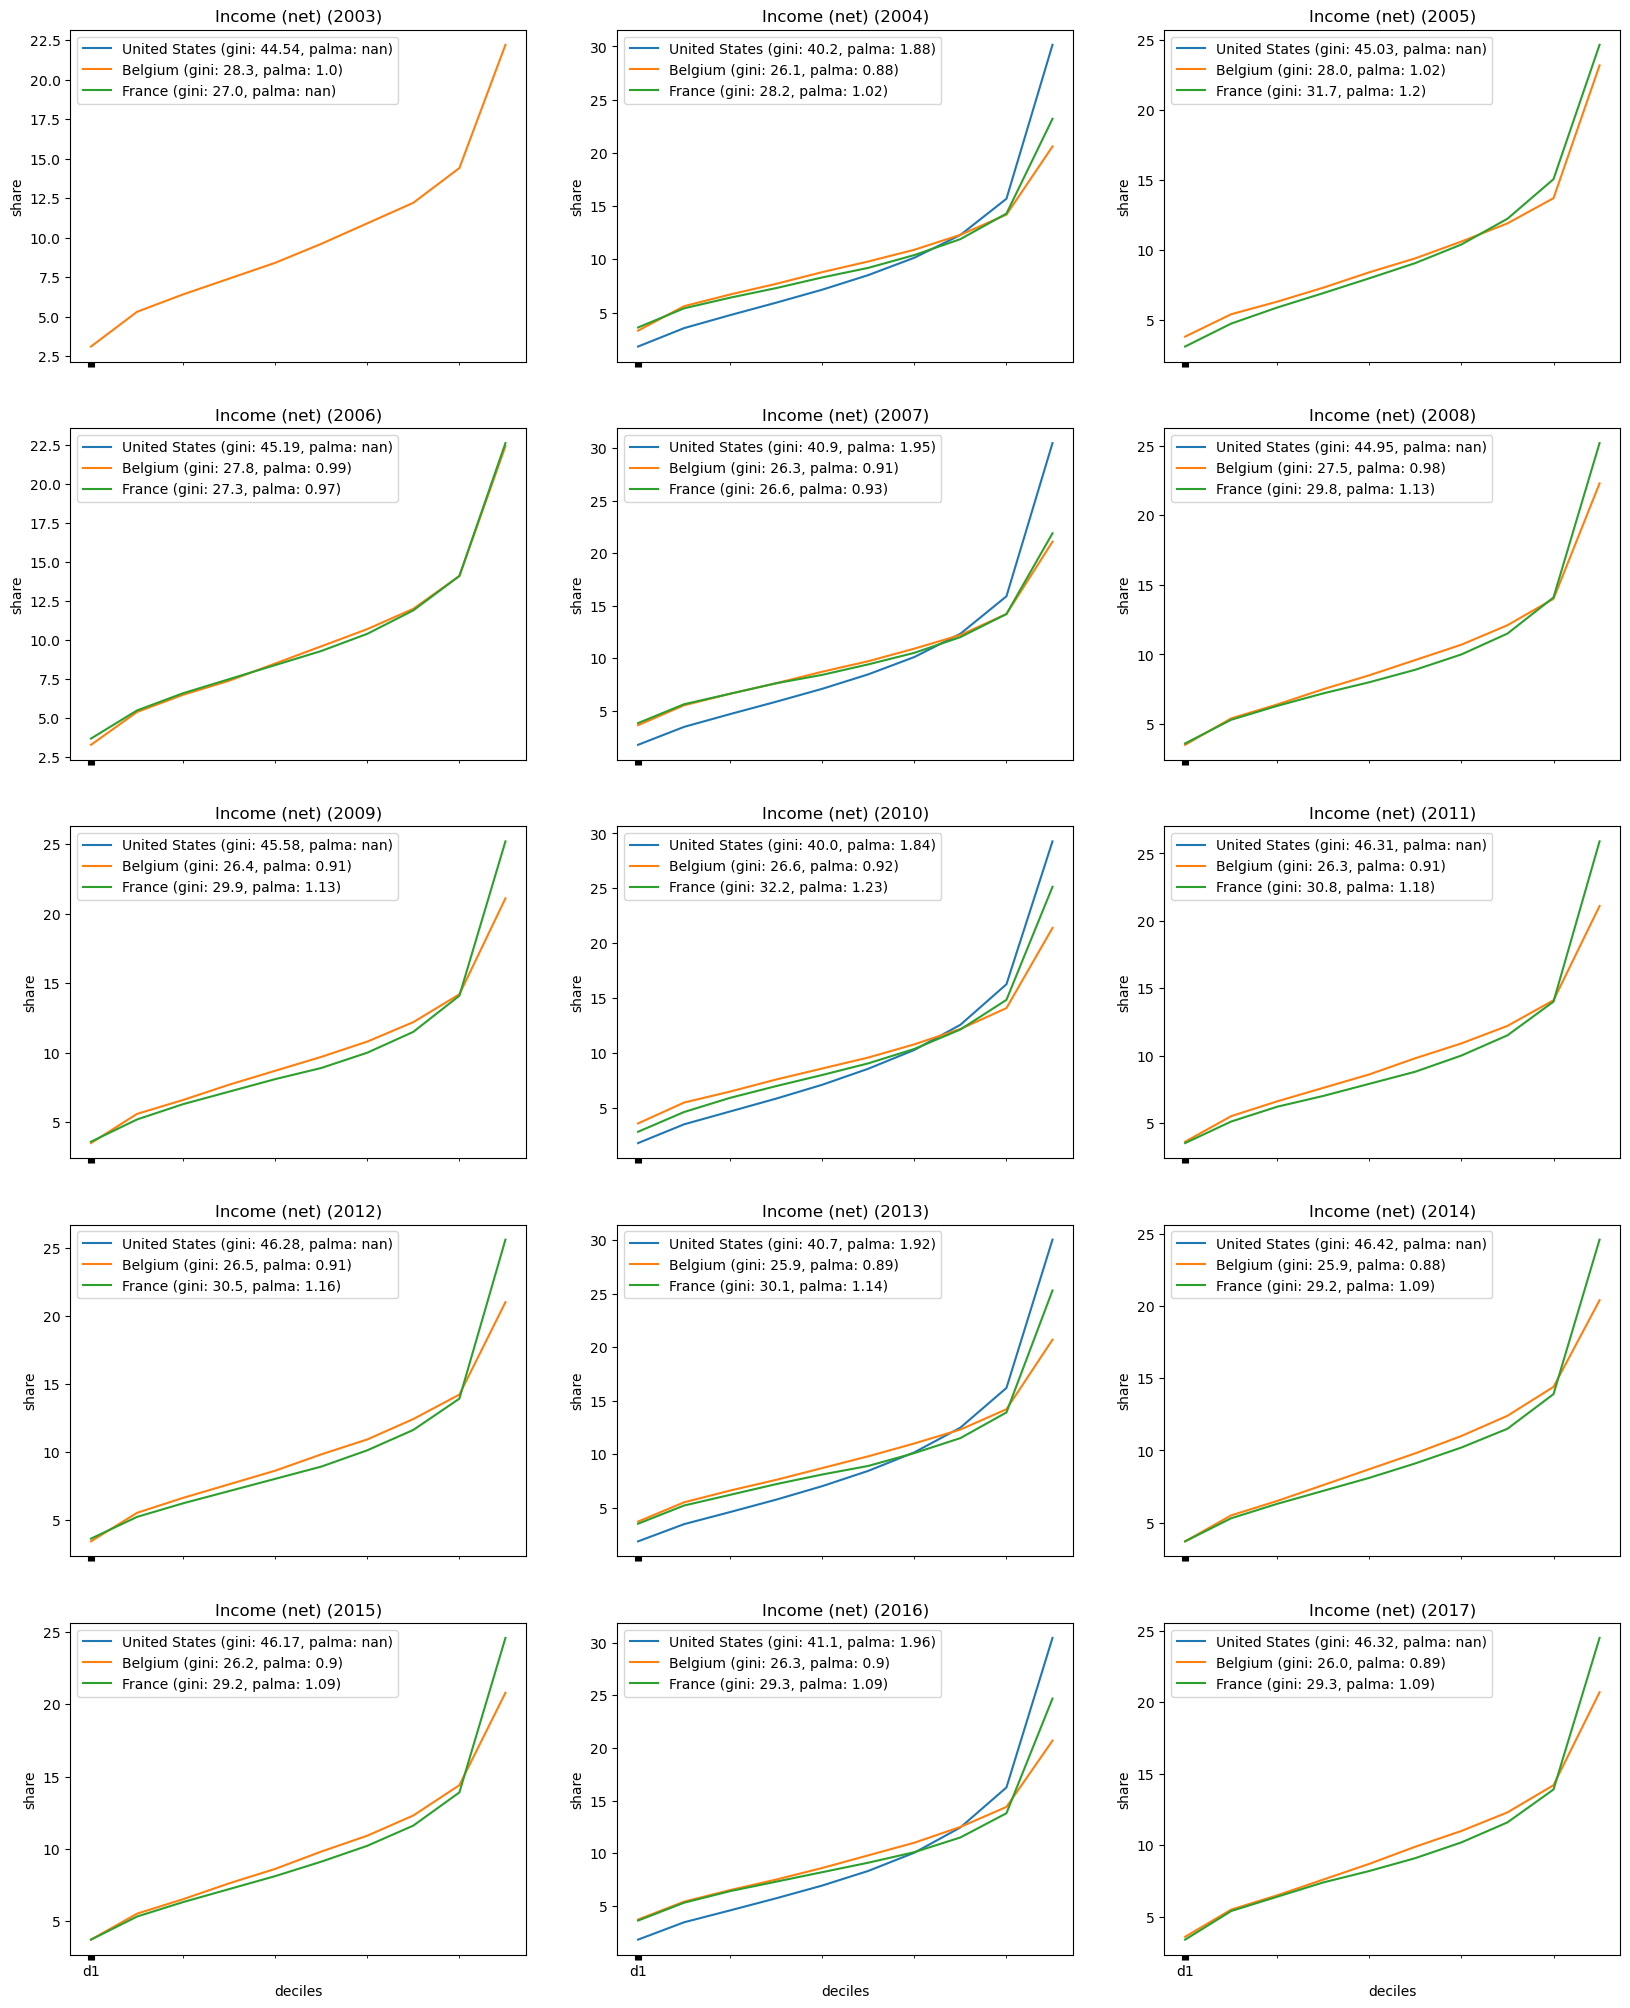

In [21]:
fig, axes = plt.subplots(5,3, figsize=(20,25), sharex=True)
axs = axes.flatten()
for i, y in enumerate(range(2003,2018)):
    plot_countries_and_year_deciles(['United States', 'Belgium', 'France'], y, kind='line', sel_sources={'United States': [0], 'Belgium': [0], 'France': [0]}, ax=axs[i])